In [26]:
!pip install xlrd

In [27]:
import pandas as pd

sharesXLS = "AppendixB_Shares.xls"
xls = pd.ExcelFile(sharesXLS)

In [28]:
print(xls.sheet_names)

['94-98 FAH', '94-98 FAFH', '03-04 FAH', '03-04 FAFH', '05-06 FAH', '05-06 FAFH', '07-08 FAH', '07-08 FAFH']


'94-98 FAH', 
'94-98 FAFH', 
'03-04 FAH', 
'03-04 FAFH', 
'05-06 FAH', 
'05-06 FAFH', 
'07-08 FAH', 
'07-08 FAFH'

In [29]:
# testing to see first sheet

sheet = [s for s in xls.sheet_names if "FAH" in s.upper()][0]
print(sheet) # 94-98 FAH

df_raw = pd.read_excel(sharesXLS, sheet_name=sheet, header=None)
df_raw.shape # (282, 16)

94-98 FAH


(282, 16)

In [30]:
# Hint given: mean pounds for men begins 7th col , 77th row
# looking at sections of datas to determine rows and columns.

display(df_raw.iloc[70:120, :12])
print(df_raw.iloc[70:120, 0].astype(str).tolist())

col_men = 7
col_women = 10

fruit_types = {
    "Apples as fruit": 79,
    "Bananas": 81,
    "Berries": 82,
    "Grapes": 83,
    "Melons": 84,
    "Oranges, Total": 85,
    "Other citrus fruit": 88,
    "Stone fruit": 89,
    "Tropical fruit": 90
}

dairy_products = {
    "Fluid milk total": 108,
    "Butter": 113,
    "Cheese": 114,
    "Yogurt": 115,
    "Dairy, Other": 116
}


,0,1,2,3,4,5,6,7,8,9,10,11
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Appendix Table B-1 (cont'd). LAFA at-home sha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,NaN,Age and gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,NaN,Boys,NaN,NaN,Girls,NaN,NaN,Men,NaN,NaN,Women,NaN
75,NaN,Mean,95% CI,NaN,Mean,95% CI,NaN,Mean,95% CI,NaN,Mean,95% CI
76,NaN,%,Lower,Upper,%,Lower,Upper,%,Lower,Upper,%,Lower
77,Total fruit,82.36,80.81,83.91,81.88,80.22,83.54,86.2,84.68,87.72,88.26,87.13
78,"Apples, Total",82.94,80.78,85.1,83.77,81.3,86.24,89.01,85.98,92.04,89.66,87.62
79,Apples as fruit,80.18,77.14,83.22,80.98,77.4,84.56,89.18,86.79,91.57,90.42,88.6


['nan', "Appendix Table B-1 (cont'd).  LAFA at-home shares: 1994-98 means and confidence intervals for boys, girls, men, and women", 'nan', 'nan', 'nan', 'nan', 'nan', 'Total fruit', '   Apples, Total', '     Apples as fruit', '     Apple juice', '   Bananas', '   Berries', '   Grapes', '   Melons', '   Oranges, Total', '     Oranges as fruit', '     Orange juice', '   Other citrus fruit', '   Stone fruit', '   Tropical fruit', 'Vegetables, Total', '   Brassica, Total', '     Broccoli and cauliflower', '   Carrots', '   Celery', '   Cucumbers', '   Green Peas', '   Leafy vegetable, Total', '     Lettuce', '   Onions', '   Peppers', '   Tomatoes', '   Sweet corn', '   Potatoes', '   Snap beans', '   Legumes dried', 'Dairy, Total', '   Fluid milk, Total', '     Fluid milk, 1 percent fat', '     Fluid milk, 2 percent fat', '     Fluid milk, Skim', '     Fluid Milk, Whole', '   Butter', '   Cheese', '   Yogurt', '   Dairy, Other', 'Meat, poultry, and fish, Total', '   Meat, Total', '     B

Men is Column 7
Woman is Column 10

Apples as Fruit: Row 79
Bananas: Row 81
Berries: Row 82
Grapes: Row 83
Melons: Row 84
Oranges, Total: Row 85
Other citrus fruit: Row 88
Stone fruit: Row 89
Tropical fruit: Row 90

Fluid milk total: Row 108
Butter: Row 113
Cheese: Row 114
Yogurt: Row 115
Dairy, Other: Row 116

In [31]:
def extract_data(sharesXLS, sheet_name, product_type, col_men, col_women):
    df = pd.read_excel(sharesXLS, sheet_name = sheet_name, header=None)

    men_vals = {product: df.iloc[row, col_men] for product, row in product_type.items()}
    women_vals = {product: df.iloc[row, col_women] for product, row in product_type.items()}

    return men_vals, women_vals



xls = pd.ExcelFile(sharesXLS)
fah_sheets = [s for s in xls.sheet_names if "FAH" in s.upper()]
print(fah_sheets)

periods = []
fruits_men, fruits_women = [], []
dairy_men, dairy_women = [], []

# loop through each sheet and extract data
for sheet in fah_sheets:
    men_f, women_f = extract_data(sharesXLS, sheet, fruit_types, col_men, col_women)
    men_d, women_d = extract_data(sharesXLS, sheet, dairy_products, col_men, col_women)

    periods.append(sheet)
    fruits_men.append(men_f)
    fruits_women.append(women_f)
    dairy_men.append(men_d)
    dairy_women.append(women_d)


# make into dataframes
fruits_men_df = pd.DataFrame(fruits_men, index=periods)
fruits_women_df = pd.DataFrame(fruits_women, index=periods)
dairy_men_df = pd.DataFrame(dairy_men, index=periods)
dairy_women_df = pd.DataFrame(dairy_women, index=periods)

fruits_men_df.to_csv("fruits_men.csv")
fruits_women_df.to_csv("fruits_women.csv")
dairy_men_df.to_csv("dairy_men.csv")
dairy_women_df.to_csv("dairy_women.csv")


['94-98 FAH', '03-04 FAH', '05-06 FAH', '07-08 FAH']


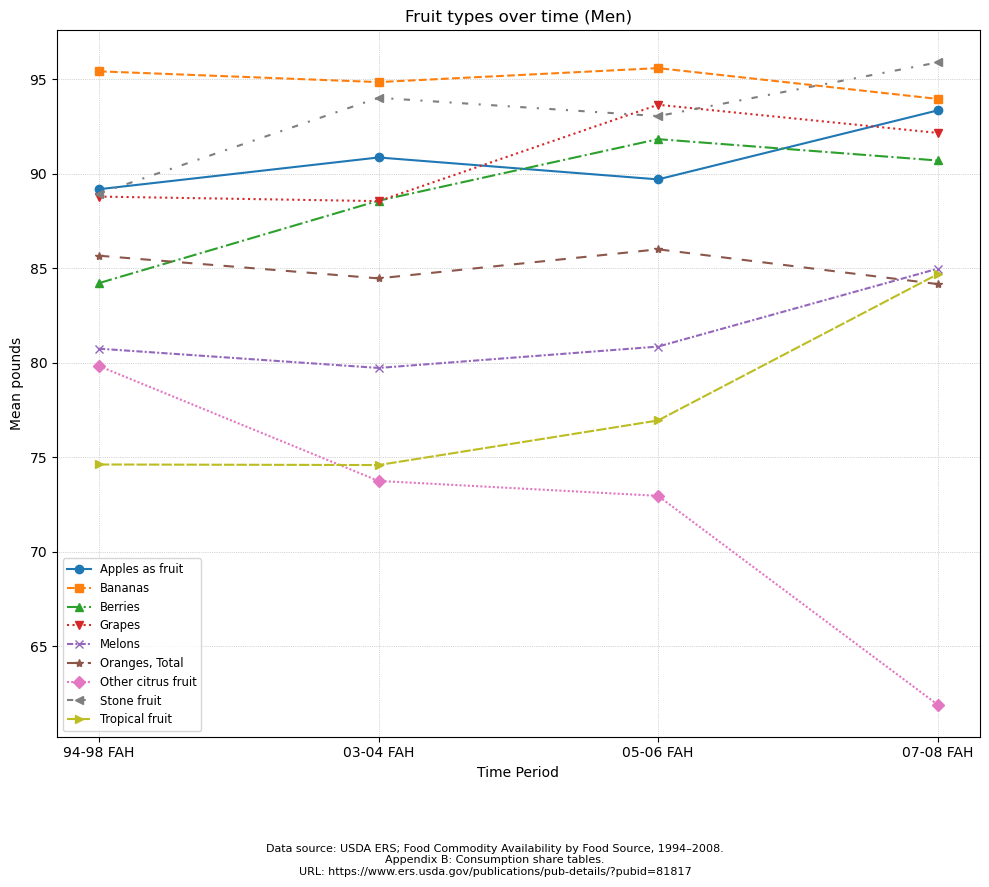

In [32]:
# plot graphs

import matplotlib.pyplot as plt


# men fruits
plt.figure(figsize=(10,8))

plt.plot(fruits_men_df.index, fruits_men_df["Apples as fruit"], label="Apples as fruit", linestyle='-', marker='o')
plt.plot(fruits_men_df.index, fruits_men_df["Bananas"], label="Bananas", linestyle='--', marker='s')
plt.plot(fruits_men_df.index, fruits_men_df["Berries"], label="Berries", linestyle='-.', marker='^')
plt.plot(fruits_men_df.index, fruits_men_df["Grapes"], label="Grapes", linestyle=':', marker='v')
plt.plot(fruits_men_df.index, fruits_men_df["Melons"], label="Melons", linestyle=(0, (3, 1, 1, 1)), marker='x')  # custom dash pattern
plt.plot(fruits_men_df.index, fruits_men_df["Oranges, Total"], label="Oranges, Total", linestyle=(0, (5, 5)), marker='*')  # long dash pattern
plt.plot(fruits_men_df.index, fruits_men_df["Other citrus fruit"], label="Other citrus fruit", linestyle=(0, (1, 1)), marker='D')  # dotted
plt.plot(fruits_men_df.index, fruits_men_df["Stone fruit"], label="Stone fruit", linestyle=(0, (3, 5, 1, 5)), marker='<')  # dash-dot-dash
plt.plot(fruits_men_df.index, fruits_men_df["Tropical fruit"], label="Tropical fruit", linestyle=(0, (5, 1)), marker='>')  # long dash-short gap


plt.title("Fruit types over time (Men)")
plt.xlabel("Time Period")
plt.ylabel("Mean pounds")
plt.legend(fontsize='small')
plt.grid(True, linestyle=':', linewidth=0.5)

plt.figtext(0.5, -0.1,
            "Data source: USDA ERS; Food Commodity Availability by Food Source, 1994–2008.\n"
            "Appendix B: Consumption share tables.\n"
            "URL: https://www.ers.usda.gov/publications/pub-details/?pubid=81817",
            ha='center', fontsize=8)

plt.tight_layout()
plt.savefig("men_fruits_plot.png", bbox_inches="tight")
plt.show()

The figure shows the mean consumption of various fruits among men from 1994 to 2008. While bananas remained consistently the most consumed fruit, stone fruits and tropical fruits showed a gradual increase while other citrus fruits experienced a sharp decline over the same period.

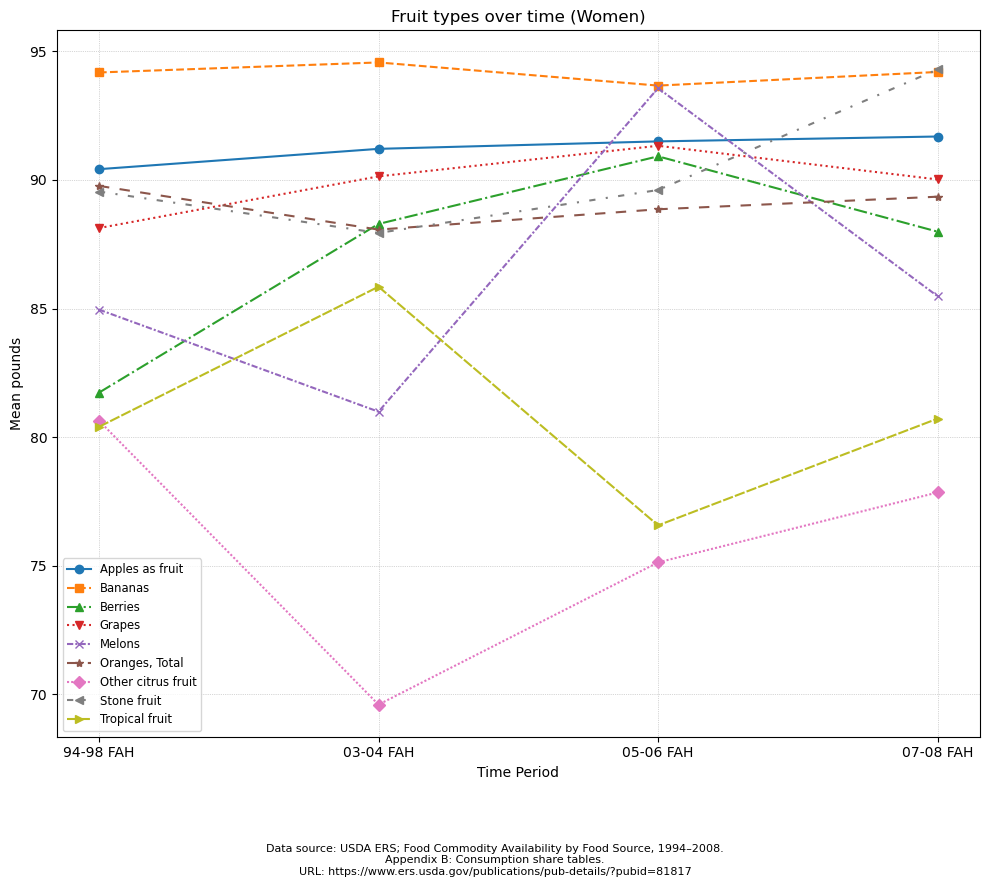

In [33]:
# women fruits
plt.figure(figsize=(10,8))

plt.plot(fruits_women_df.index, fruits_women_df["Apples as fruit"], label="Apples as fruit", linestyle='-', marker='o')
plt.plot(fruits_women_df.index, fruits_women_df["Bananas"], label="Bananas", linestyle='--', marker='s')
plt.plot(fruits_women_df.index, fruits_women_df["Berries"], label="Berries", linestyle='-.', marker='^')
plt.plot(fruits_women_df.index, fruits_women_df["Grapes"], label="Grapes", linestyle=':', marker='v')
plt.plot(fruits_women_df.index, fruits_women_df["Melons"], label="Melons", linestyle=(0, (3, 1, 1, 1)), marker='x')  # custom dash
plt.plot(fruits_women_df.index, fruits_women_df["Oranges, Total"], label="Oranges, Total", linestyle=(0, (5, 5)), marker='*')  # long dash pattern
plt.plot(fruits_women_df.index, fruits_women_df["Other citrus fruit"], label="Other citrus fruit", linestyle=(0, (1, 1)), marker='D')  # dotted
plt.plot(fruits_women_df.index, fruits_women_df["Stone fruit"], label="Stone fruit", linestyle=(0, (3, 5, 1, 5)), marker='<')  # dash-dot-dash
plt.plot(fruits_women_df.index, fruits_women_df["Tropical fruit"], label="Tropical fruit", linestyle=(0, (5, 1)), marker='>')  # long dash-short gap


plt.title("Fruit types over time (Women)")
plt.xlabel("Time Period")
plt.ylabel("Mean pounds")
plt.legend(fontsize='small')
plt.grid(True, linestyle=':', linewidth=0.5)

plt.figtext(0.5, -0.1,
            "Data source: USDA ERS; Food Commodity Availability by Food Source, 1994–2008.\n"
            "Appendix B: Consumption share tables.\n"
            "URL: https://www.ers.usda.gov/publications/pub-details/?pubid=81817",
            ha='center', fontsize=8)

plt.tight_layout()
plt.savefig("women_fruits_plot.png", bbox_inches="tight")
plt.show()

The figure shows that bananas were consistently the most consumed fruit by women (similar finding to men). While most fruit preferences fluctuated, berry showed a steady increase, rising from one of the least popular to one of the most consumed fruits by 2008.

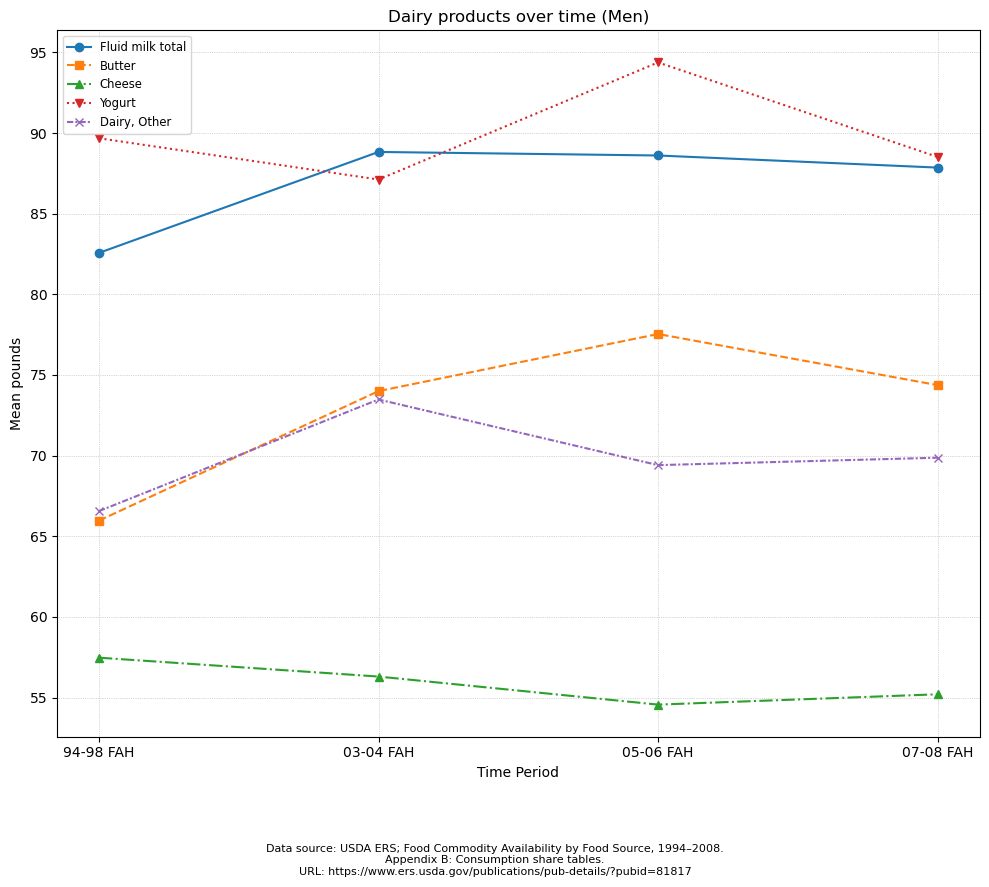

In [34]:
# plot graphs dairy


# men
plt.figure(figsize=(10,8))

plt.plot(dairy_men_df.index, dairy_men_df["Fluid milk total"], label="Fluid milk total", linestyle='-', marker='o')
plt.plot(dairy_men_df.index, dairy_men_df["Butter"], label="Butter", linestyle='--', marker='s')
plt.plot(dairy_men_df.index, dairy_men_df["Cheese"], label="Cheese", linestyle='-.', marker='^')
plt.plot(dairy_men_df.index, dairy_men_df["Yogurt"], label="Yogurt", linestyle=':', marker='v')
plt.plot(dairy_men_df.index, dairy_men_df["Dairy, Other"], label="Dairy, Other", linestyle=(0, (3, 1, 1, 1)), marker='x')  # custom dash pattern


plt.title("Dairy products over time (Men)")
plt.xlabel("Time Period")
plt.ylabel("Mean pounds")
plt.legend(fontsize='small')
plt.grid(True, linestyle=':', linewidth=0.5)

plt.figtext(0.5, -0.1,
            "Data source: USDA ERS; Food Commodity Availability by Food Source, 1994–2008.\n"
            "Appendix B: Consumption share tables.\n"
            "URL: https://www.ers.usda.gov/publications/pub-details/?pubid=81817",
            ha='center', fontsize=8)

plt.tight_layout()
plt.savefig("men_dairy_plot.png", bbox_inches="tight")
plt.show()

The figure shows that fluid milk and yogurt were the most consumed dairy products by men, though their popularity was highly volatile. Yogurt consumption saw a massive spike during the 2005-2006 period to briefly become the top category before falling sharply by 2008.

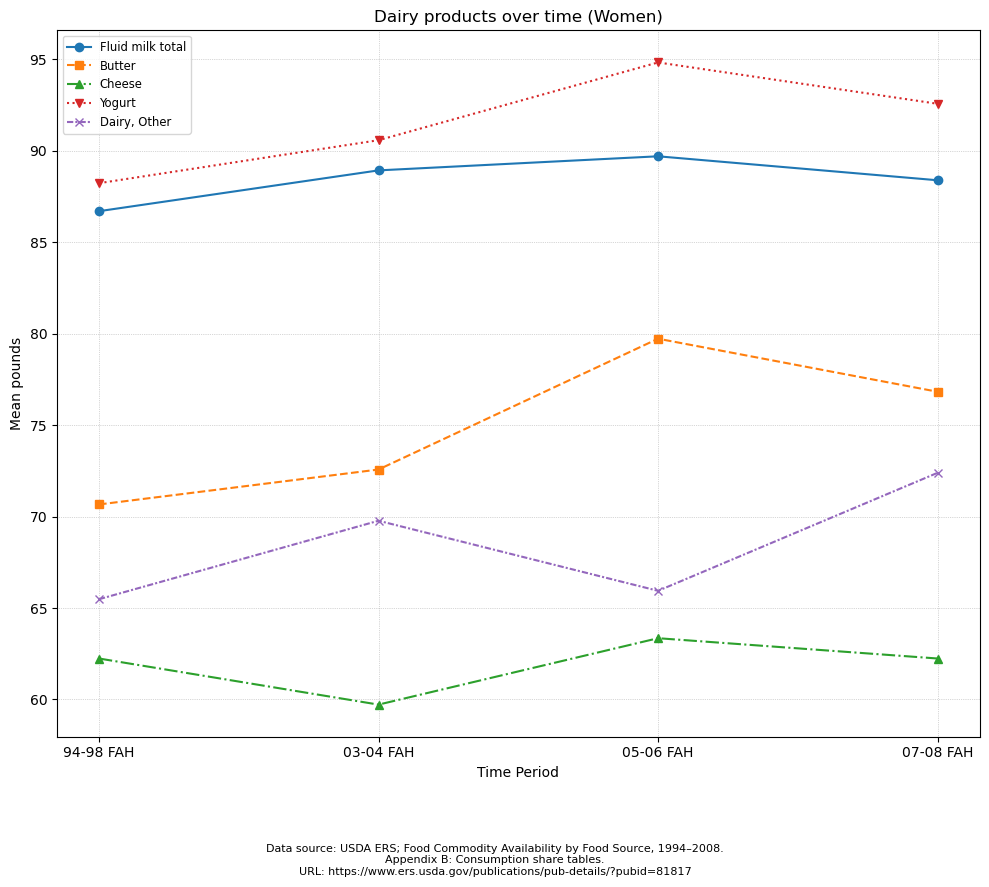

In [35]:
# women
plt.figure(figsize=(10,8))

plt.plot(dairy_women_df.index, dairy_women_df["Fluid milk total"], label="Fluid milk total", linestyle='-', marker='o')
plt.plot(dairy_women_df.index, dairy_women_df["Butter"], label="Butter", linestyle='--', marker='s')
plt.plot(dairy_women_df.index, dairy_women_df["Cheese"], label="Cheese", linestyle='-.', marker='^')
plt.plot(dairy_women_df.index, dairy_women_df["Yogurt"], label="Yogurt", linestyle=':', marker='v')
plt.plot(dairy_women_df.index, dairy_women_df["Dairy, Other"], label="Dairy, Other", linestyle=(0, (3, 1, 1, 1)), marker='x')  # custom dash pattern


plt.title("Dairy products over time (Women)")
plt.xlabel("Time Period")
plt.ylabel("Mean pounds")
plt.legend(fontsize='small')
plt.grid(True, linestyle=':', linewidth=0.5)

plt.figtext(0.5, -0.1,
            "Data source: USDA ERS; Food Commodity Availability by Food Source, 1994–2008.\n"
            "Appendix B: Consumption share tables.\n"
            "URL: https://www.ers.usda.gov/publications/pub-details/?pubid=81817",
            ha='center', fontsize=8)

plt.tight_layout()
plt.savefig("women_dairy_plot.png", bbox_inches="tight")
plt.show()

This chart tracks the preferences in women's dairy consumption over a 14-year period. While cheese consumption remained consistently low (similar to men's dairy consumtion), butter and other dairy products showed the most pronounced growth, which shows diversification in women's dairy choices over time.